Radolan Specs
NODATA_value -1
Unit 1/10 mm

Radolan right after load:
    min: 0 max: 4095
    nan occurence:  False
Radolan after Subsetting and convert digital to physical values:
    min:0.0 max: 123.5
    nan occurence:  True

In [3]:
from irrigation_detection import download_radolan_SF
from irrigation_detection import unpack_radolan_SF
from irrigation_detection import open_radolan_SF
from irrigation_detection import subset_ds
from irrigation_detection import export_values

In [ ]:
# Download Radolan SF Products from https://opendata.dwd.de/. Arguments must be (startyear, stopyear, local download folder).
download_radolan_SF(2015, 2021, 'D://radolanSF_download/')

In [ ]:
# Exctract files from archive.
unpack_radolan_SF('D://radolanSF_download')

In [ ]:
# Read radolan files into an xarray dataset.
radolan_SF = open_radolan_SF('D://radolanSF_download/*2350-dwd---bin.gz')

In [ ]:
# Subset dataset
radolan_SF_subset = subset_ds(r'C:\Users\USER\Desktop\Master_Irrigation\03_GIS\oberrheingraben_shp\oberrheingraben-polygon.shp', radolan_SF)

In [ ]:
# Apply conversation of digital units to physical units.
radolan_SF_subset['SF'] = radolan_SF_subset['SF'] * 0.1

In [ ]:
# Export xr as .nc file 
radolan_SF_subset.to_netcdf(r'C:\Users\USER\Desktop\Master_Irrigation\03_GIS\datasets\RADOLAN_1km.nc')

In [8]:
import xarray as xr
radolan = xr.open_dataset(r'C:\Users\USER\Desktop\Master_Irrigation\03_GIS\datasets\RADOLAN_1km.nc')
radolan

<xarray.Dataset>
Dimensions:  (time: 2479, lat: 161, lon: 102)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T23:50:00 ... 2021-10-14T23:50:00
  * lat      (lat) float64 48.86 48.87 48.88 48.89 ... 50.19 50.19 50.2 50.21
  * lon      (lon) float64 7.61 7.622 7.634 7.647 ... 8.814 8.826 8.838 8.851
Data variables:
    SF       (time, lat, lon) float64 ...
Attributes:
    radarid:         10000
    radolanversion:  2.13.1
    radarlocations:  ['boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'fld',...
    radardays:       ['asd 24', 'boo 24', 'eis 24', 'emd 24', 'ess 24', 'fbg ...

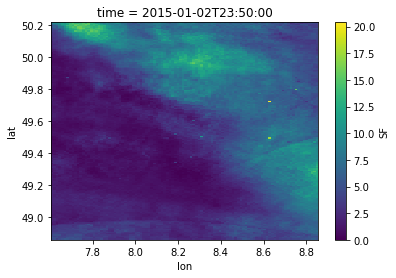

In [11]:
radolan.isel(time=1).SF.plot()

In [ ]:
def xr_var_stats(da):
    """
    Arguments:
    """
    
    import xarray as xr
    import numpy as np

    #get unique values
    unique_values = np.unique(da)
    
    #Print min,max, nan occurence, 
    print('min: %s' %unique_values.min(), 'max: %s' %unique_values.max())
    if True in np.isnan(unique_values):
        print('nan occurence:  True')
    else:
        print('nan occurence:  False')
    
    return print('stats finished')

In [ ]:
xr.plot.hist(radolan_SF_subset.SF.isel(time=1), bins=20, range=(0.1,40), edgecolor='black')

In [ ]:
export_values(latitude=49.85083645182146, longitude=8.463941352976518, ds=radolan_SF_subset, name='point_1_SF.csv')

In [ ]:
#Visualisations with http://christopherbull.com.au/mkmov/ command line tool

In [ ]:
import hvplot.xarray

In [ ]:
radolan_SF_subset = radolan_SF_subset.load()

In [ ]:
radolan_SF_subset

In [ ]:
hvplot.save(radolan_SF_subset.isel(time=slice(0,10)).hvplot.quadmesh(crs='WGS84',frame_height=540, projection='PlateCarree',project=True, geo=True, rasterize=True, dynamic=False), "test2.html")